# Knowledge Graph (KG) Dataloader with Lightning

This guide shows how to load and use a Knowledge Graph dataset with the PyTorch Lightning LightningDataModule.

To load and simulate data from the KG model, follow the steps below:

Step 1: 📦 Import the module

In [1]:
import sys
import os

# Go up to the root where `vpeleaderboard/` is located
sys.path.append(os.path.abspath("../../"))

In [2]:
from vpeleaderboard.data.src.kg.biobridge_datamodule_hetero import BioBridgeDataModule

c:\Users\hsrak\Documents\VPELeaderboard\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Step 2: ⚙️ Initialize the KGDataModule

Specify the data directories and initialize the BioBridgeDataModule:

In [3]:
# Initial
# ize with paths to PrimeKG and BioBridge datasets
# dm = BioBridgeDataModule(
#     primekg_dir="../../../data/primekg/",
#     biobridge_dir="../../../data/biobridge_primekg/",
#     batch_size=8
# )
import hydra
with hydra.initialize(config_path="../../vpeleaderboard/configs", version_base=None):
    cfg = hydra.compose(config_name="config")
    dm = BioBridgeDataModule(cfg)


Step 3: 🧹 Prepare data

Prepare the KG data by loading and caching it:

In [4]:
# Load data, embeddings, and node/edge mappings
dm.prepare_data()

🔁 Loading cached data from ./biobridge_cache.pkl


Step 4: 🧠 Setup the data splits

Split the data into training, validation, and test sets:

In [5]:
# Build HeteroData and apply RandomLinkSplit
dm.setup()

🔁 Reusing previously split train/val/test data


Step 5: 🧪 Access the dataloaders

Now, you can retrieve the standard Lightning dataloaders:

In [6]:

print(dm.data.keys())  # Should include 'train', 'val', 'test' if setup worked


dict_keys(['init', 'train', 'val', 'test'])


Training data

In [7]:
train_loader = dm.train_dataloader()
train_batch = next(iter(train_loader))
print(train_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[440447],
    pos_edge_label_index=[2, 440447],
    neg_edge_label=[440447],
    neg_edge_label_index=[2, 440447],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[571],
    pos_edge_label_index=[2, 571],
    neg_edge_label=[571],
    neg_edge_label_index=[2, 571],
  },
  (drug, enzyme, gene/

Validation data

In [8]:
val_loader = dm.val_dataloader()
val_batch = next(iter(val_loader))
print(val_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[62920],
    pos_edge_label_index=[2, 62920],
    neg_edge_label=[62920],
    neg_edge_label_index=[2, 62920],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[81],
    pos_edge_label_index=[2, 81],
    neg_edge_label=[81],
    neg_edge_label_index=[2, 81],
  },
  (drug, enzyme, gene/protein)

Test data

In [9]:
test_loader = dm.test_dataloader()
test_batch = next(iter(test_loader))
print(test_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 503367],
    pos_edge_label=[125841],
    pos_edge_label_index=[2, 125841],
    neg_edge_label=[125841],
    neg_edge_label_index=[2, 125841],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 652],
    pos_edge_label=[162],
    pos_edge_label_index=[2, 162],
    neg_edge_label=[162],
    neg_edge_label_index=[2, 162],
  },
  (drug, enzyme, gene/

In [10]:
# Train edge index
print("Train Edge Index:")
print(dm.data["train"].edge_index_dict)

# Validation edge index
print("Validation Edge Index:")
print(dm.data["val"].edge_index_dict)

# Test edge index
print("Test Edge Index:")
print(dm.data["test"].edge_index_dict)


Train Edge Index:
{('gene/protein', 'ppi', 'gene/protein'): tensor([[ 1178,  4493,  2572,  ...,  1287,  5208,  6069],
        [ 2188,  4760, 11767,  ...,  4582,   157,  6265]]), ('drug', 'carrier', 'gene/protein'): tensor([[ 440,  190,  215,  ...,  122,  381,  185],
        [4293, 4293, 4293,  ..., 4293, 4706, 4706]]), ('drug', 'enzyme', 'gene/protein'): tensor([[  837,   986,   563,  ...,   875,   709,   302],
        [ 3993, 11919,  8900,  ..., 12286,  7821,  3854]]), ('drug', 'target', 'gene/protein'): tensor([[ 2333,    90,   344,  ...,  1554,  1715,  4638],
        [ 6974, 13925,  1162,  ...,   490, 16430, 14630]]), ('drug', 'transporter', 'gene/protein'): tensor([[ 1059,   257,  2033,  ...,   714,   402,   443],
        [ 8392,  8392, 10044,  ...,  4131,  4131,  4131]]), ('drug', 'contraindication', 'disease'): tensor([[ 1886,   603,   883,  ...,   914,  5727,   639],
        [ 7143, 11059,  4353,  ..., 11269,  6522,  9790]]), ('drug', 'indication', 'disease'): tensor([[ 1092,  5

In [11]:
print("📌 Available node types:")
print(dm.data["train"].node_types)

print("📌 Available edge types:")
print(dm.data["train"].edge_types)


📌 Available node types:
['biological_process', 'cellular_component', 'disease', 'drug', 'gene/protein', 'molecular_function']
📌 Available edge types:
[('gene/protein', 'ppi', 'gene/protein'), ('drug', 'carrier', 'gene/protein'), ('drug', 'enzyme', 'gene/protein'), ('drug', 'target', 'gene/protein'), ('drug', 'transporter', 'gene/protein'), ('drug', 'contraindication', 'disease'), ('drug', 'indication', 'disease'), ('drug', 'off-label use', 'disease'), ('drug', 'synergistic interaction', 'drug'), ('gene/protein', 'associated with', 'disease'), ('disease', 'parent-child', 'disease'), ('biological_process', 'parent-child', 'biological_process'), ('molecular_function', 'parent-child', 'molecular_function'), ('cellular_component', 'parent-child', 'cellular_component'), ('gene/protein', 'interacts with', 'molecular_function'), ('gene/protein', 'interacts with', 'cellular_component'), ('gene/protein', 'interacts with', 'biological_process'), ('gene/protein', 'carrier', 'drug'), ('gene/protein

Step 6: 🕸️ Visualize a Subgraph of the Knowledge Graph

Plotting Local Neighborhood of a Node in a Heterogeneous Knowledge Graph (DYNC1I2 Example)

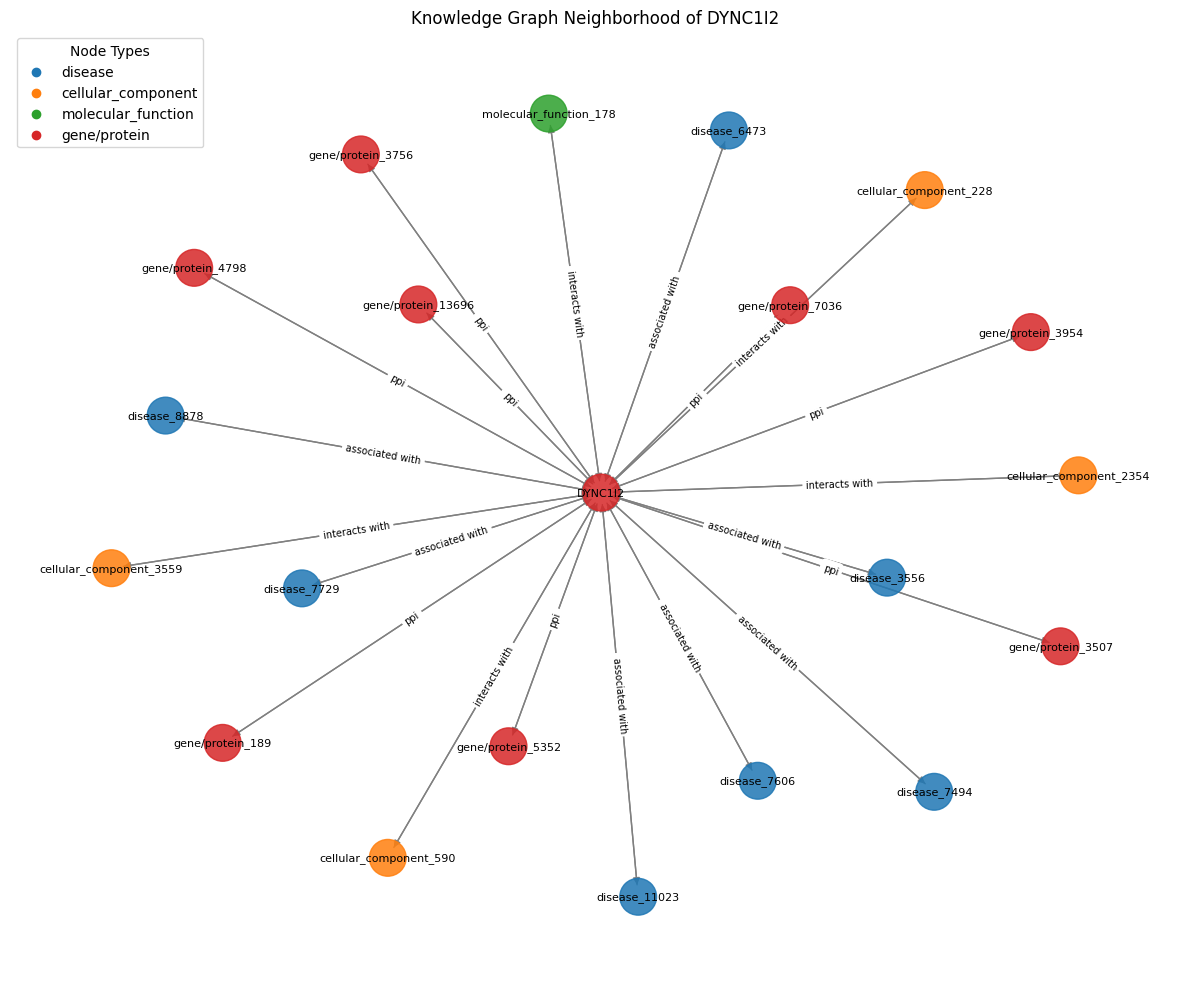

In [12]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ✅ Load cached HeteroData directly
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

hetero_data = data["init"]  # directly use top-level keys
mapper = data.get("mapper")  # only available if you saved it, else rebuild

# Target info
target_node_type = "gene/protein"
target_node_name = "DYNC1I2"

# 🧭 Step 1: Global index of DYNC1I2 (replace with actual logic or mapping)
name_to_global_index = {"DYNC1I2": 6726}  # ← Replace with correct mapping
global_idx = name_to_global_index.get(target_node_name)

if global_idx is None:
    raise ValueError(f"Could not find global index for {target_node_name}")

# 🎯 Step 2: Local index in HeteroData
local_idx = None
for nt in hetero_data.node_types:
    if nt == target_node_type:
        # Build dummy from_nidx map (replace with real mapping if available)
        from_nidx = {global_id: local for local, global_id in enumerate(range(hetero_data[nt].x.size(0)))}
        local_idx = from_nidx.get(global_idx)


if local_idx is None:
    raise ValueError("Could not find local index for the target node")

# 📡 Step 3: Build graph
G = nx.MultiDiGraph()
G.add_node(target_node_name, type=target_node_type)

for edge_type in hetero_data.edge_types:
    src_type, rel_type, dst_type = edge_type
    edge_index = hetero_data[edge_type].edge_index

    for i in range(edge_index.size(1)):
        src, dst = edge_index[:, i].tolist()
        if src_type == target_node_type and src == local_idx:
            neighbor = f"{dst_type}_{dst}"
            G.add_node(neighbor, type=dst_type)
            G.add_edge(target_node_name, neighbor, label=rel_type)
        elif dst_type == target_node_type and dst == local_idx:
            neighbor = f"{src_type}_{src}"
            G.add_node(neighbor, type=src_type)
            G.add_edge(neighbor, target_node_name, label=rel_type)

# 🎨 Step 4: Color nodes by type
all_types = list({d["type"] for _, d in G.nodes(data=True)})
color_palette = list(mcolors.TABLEAU_COLORS.values())
color_map = {ntype: color_palette[i % len(color_palette)] for i, ntype in enumerate(all_types)}

node_colors = [color_map[G.nodes[n]["type"]] for n in G.nodes]

# 🖼️ Step 5: Plot
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700, alpha=0.85)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)

edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

# Legend
for t, color in color_map.items():
    plt.scatter([], [], color=color, label=t)
plt.legend(loc="upper left", title="Node Types")

plt.title(f"Knowledge Graph Neighborhood of {target_node_name}")
plt.axis("off")
plt.tight_layout()
plt.show()
